## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [3]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

df = pd.read_excel("/Users/rsuncin.fellow/Desktop/TKH Projects/rental-pricing-explore-normal/data/raw/realestate.xlsx")

# check how many missing values we have

df.isna().sum()

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [7]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

# view new columns
df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [65]:
selected = ["lat", "long", "No"]

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(selected, axis=1)
df_drop.head()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,"""84.87882""",100.0,37.9
1,19.5,"""306.5947""",9.0,42.2
2,13.3,"""561.9845""",5.0,47.3
3,13.3,"""561.9845""",5.0,54.8
4,5.0,"""390.5684""",5.0,43.1


In [55]:
# remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("float")
df_drop.head()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,84.87882,100.0,37.9
1,19.5,306.5947,9.0,42.2
2,13.3,561.9845,5.0,47.3
3,13.3,561.9845,5.0,54.8
4,5.0,390.5684,5.0,43.1


In [29]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [34]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df.dropna(how='all')

# check shape again
df_drop.shape

(414, 4)

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [36]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df.describe(include='all')

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,403.000000,414,413.000000,414.000000,414.000000,414.000000
unique,NaN,NaN,259,NaN,NaN,NaN,NaN
top,NaN,NaN,"""289.3248""",NaN,NaN,NaN,NaN
freq,NaN,NaN,13,NaN,NaN,NaN,NaN
mean,207.500000,18.607196,NaN,4.283293,24.969030,121.533361,37.980193
std,119.655756,22.656541,NaN,5.580361,0.012410,0.015347,13.606488
min,1.000000,0.000000,NaN,-6.000000,24.932070,121.473530,7.600000
25%,104.250000,8.700000,NaN,1.000000,24.963000,121.528085,27.700000
50%,207.500000,16.100000,NaN,4.000000,24.971100,121.538630,38.450000
75%,310.750000,28.300000,NaN,6.000000,24.977455,121.543305,46.600000


In [37]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it

df_outl = df_drop[df_drop.num_convenience_stores >= 0]
df_outl.shape

(412, 4)

In [56]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_outl = df_outl[df_outl["num_convenience_stores"]<100]
df_outl.shape

(411, 4)

In [57]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value
df_outl = df_outl[df_outl.house_age != 410.3]
df_outl.shape

(400, 4)

In [11]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
...
df = sns.load_dataset("price_unit_area")
sns.histplot(data=df, y = "price_unit_area")
plt.show()

ValueError: 'price_unit_area' is not one of the example datasets.

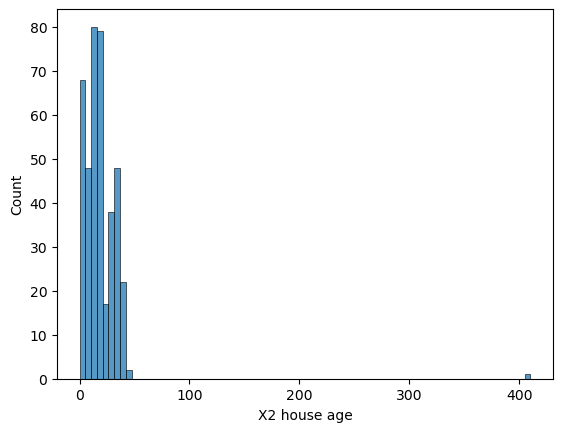

In [64]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
...



In [ ]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
...


In [1]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
...


In [ ]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
...


In [ ]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
...

In [ ]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
...

C:\Users\saidmf\AppData\Local\Temp\ipykernel_13920\4107131777.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_outl.corr(), dtype=np.bool))


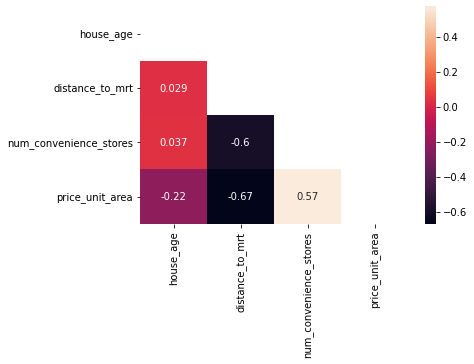

In [68]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=np.bool))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

In [69]:
# save data for later modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)